In [1]:
import pandas as pd

In [6]:
data=pd.read_csv("synnaxdata/train.csv")
test=pd.read_csv("synnaxdata/test.csv")

In [7]:
data.head()

,Id,industry,sector,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,...,Q10_TOTAL_STOCKHOLDERS_EQUITY,Q10_NET_INCOME,Q10_GROSS_PROFIT,Q10_COST_OF_REVENUES,Q10_REVENUES,Q10_OPERATING_INCOME,Q10_OPERATING_EXPENSES,Q10_EBITDA,Q10_DEPRECIATION_AND_AMORTIZATION,Q10_fiscal_year_end
0,196,Personal Services,Consumer Cyclical,1174.0,5.0,10.0,9.0,4.0,8.0,12.549223,...,2.405020e+08,NaN,2.317100e+07,5.431900e+07,4.073200e+07,2150000.0,5946000.0,1.722500e+07,15075000.0,0.0
1,1568,Building Products & Equipment,Industrials,3600.0,4.0,4.0,3.0,4.0,3.0,1222.000000,...,3.265380e+08,-71929000.0,4.105740e+08,6.926880e+08,1.103262e+09,-39287000.0,333229000.0,7.734500e+07,116632000.0,0.0
2,1218,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.066300e+10,603000000.0,1.649000e+09,4.587000e+09,6.236000e+09,663000000.0,214000000.0,1.435000e+09,772000000.0,0.0
3,23,Scientific & Technical Instruments,Technology,143.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758000e+03,-9715.0,0.000000e+00,NaN,NaN,-9683.0,9683.0,-9.683000e+03,0.0,0.0
4,783,Drug Manufacturers - Specialty & Generic,Healthcare,36.0,NaN,NaN,NaN,NaN,NaN,1.231544,...,2.592400e+07,-4676000.0,1.205000e+07,0.000000e+00,1.205000e+07,-1594000.0,13644000.0,-1.594000e+06,0.0,0.0


In [8]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Columns: 212 entries, Id to Q10_fiscal_year_end
dtypes: float64(207), int64(1), object(4)
memory usage: 2.6+ MB


In [10]:
targets=[c for c in data.columns if c.startswith("Q0_")]
features=[c for c in data.columns if c not in targets+["Id"]]

In [16]:
print(data[targets].isna().mean().sort_values(ascending=False).head(20))
print(data[features].isna().mean().sort_values(ascending=False).head(20))

Q0_TOTAL_ASSETS                 0.0
Q0_TOTAL_LIABILITIES            0.0
Q0_TOTAL_STOCKHOLDERS_EQUITY    0.0
Q0_GROSS_PROFIT                 0.0
Q0_COST_OF_REVENUES             0.0
Q0_REVENUES                     0.0
Q0_OPERATING_INCOME             0.0
Q0_OPERATING_EXPENSES           0.0
Q0_EBITDA                       0.0
Q0_fiscal_year_end              0.0
dtype: float64
trailingPE                 0.555419
shareHolderRightsRisk      0.303571
boardRisk                  0.303571
compensationRisk           0.303571
auditRisk                  0.303571
overallRisk                0.303571
Q7_NET_INCOME              0.250616
Q10_NET_INCOME             0.196429
targetHighPrice            0.189039
numberOfAnalystOpinions    0.189039
targetMedianPrice          0.189039
targetMeanPrice            0.189039
targetLowPrice             0.189039
Q10_COST_OF_REVENUES       0.186576
Q3_NET_INCOME              0.185345
Q10_REVENUES               0.184113
Q9_NET_INCOME              0.182266
Q7_COST_OF_RE

In [18]:
data[targets].describe().T

,count,mean,std,min,25%,50%,75%,max
Q0_TOTAL_ASSETS,1624.0,4.797691e+09,2.636638e+10,-1.953310e+11,9.808875e+07,631705500.0,2.708209e+09,3.848300e+11
Q0_TOTAL_LIABILITIES,1624.0,3.200071e+09,1.624373e+10,-1.399650e+11,3.658962e+07,291650000.0,1.613343e+09,2.127170e+11
Q0_TOTAL_STOCKHOLDERS_EQUITY,1624.0,1.289882e+09,1.169109e+10,-9.784800e+10,1.765381e+07,247001000.0,1.031333e+09,1.807181e+11
Q0_GROSS_PROFIT,1624.0,4.240823e+08,1.817923e+09,-9.170000e+08,2.289663e+06,37557000.0,2.074888e+08,3.718600e+10
Q0_COST_OF_REVENUES,1624.0,6.584900e+08,3.085667e+09,-1.587300e+10,6.294782e+05,25135986.0,2.579560e+08,5.074900e+10
Q0_REVENUES,1624.0,1.062931e+09,4.041767e+09,-3.850000e+08,6.687640e+06,92668000.0,5.159818e+08,4.904800e+10
Q0_OPERATING_INCOME,1624.0,9.842535e+07,6.310543e+08,-2.654000e+09,-1.113500e+07,-200146.5,4.105925e+07,1.374800e+10
Q0_OPERATING_EXPENSES,1624.0,3.557741e+08,1.553039e+09,-2.403000e+07,1.159175e+07,46144500.0,1.805822e+08,4.111800e+10
Q0_EBITDA,1624.0,6.830815e+07,1.438216e+09,-3.282900e+10,-1.493733e+07,-700000.0,3.605775e+07,3.413800e+10
Q0_fiscal_year_end,1624.0,1.662562e-02,1.279034e-01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00


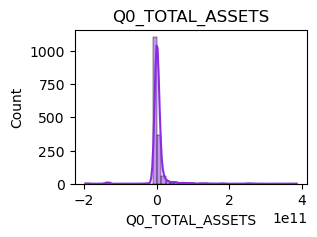

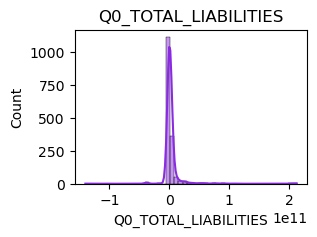

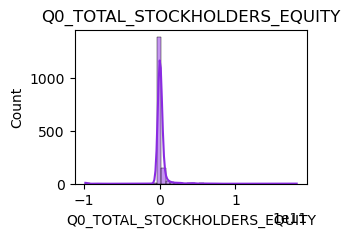

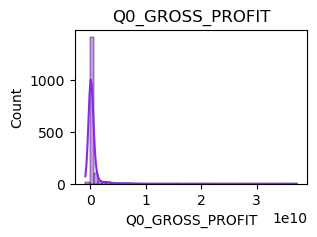

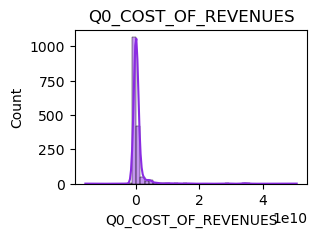

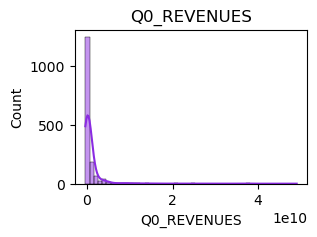

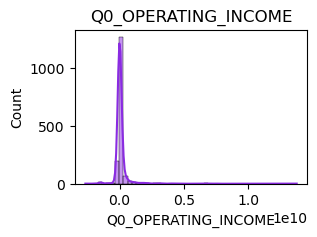

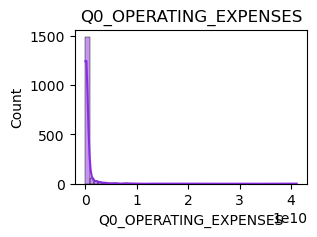

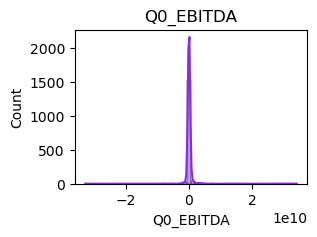

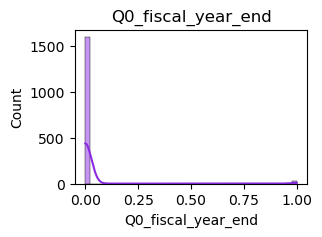

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in targets:
    plt.figure(figsize=(3,2))
    sns.histplot(data[col],bins=50,kde=True,color='blueviolet')
    plt.title(col)
    plt.show()

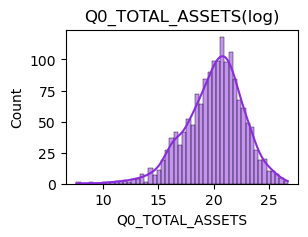

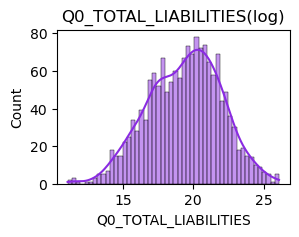

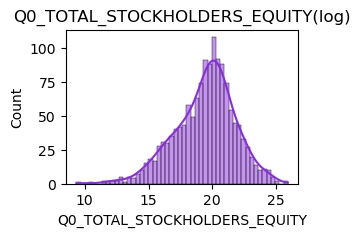

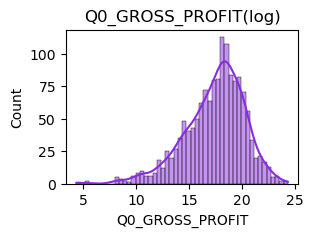

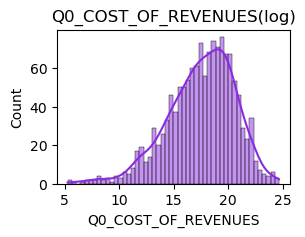

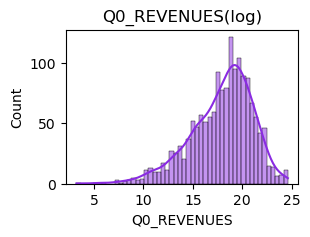

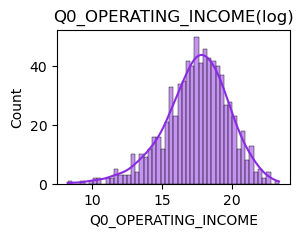

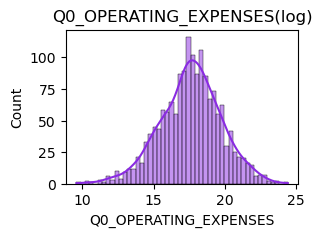

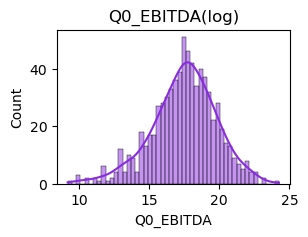

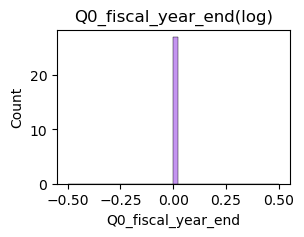

In [28]:
import numpy as np
for col in targets:
    plt.figure(figsize=(3,2))
    values=data[col].dropna()
    values=values[values>0]
    sns.histplot(np.log(values),bins=50,kde=True,color='blueviolet')
    plt.title(col+"(log)")
    plt.show()

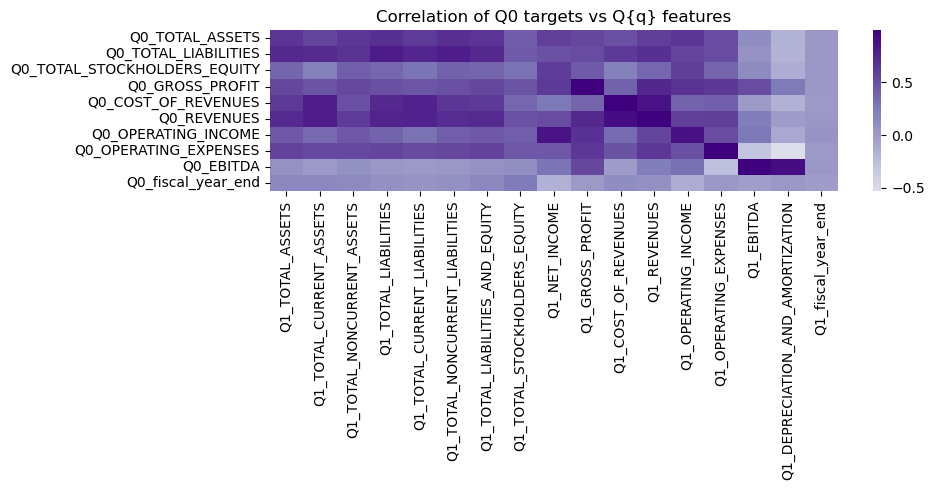

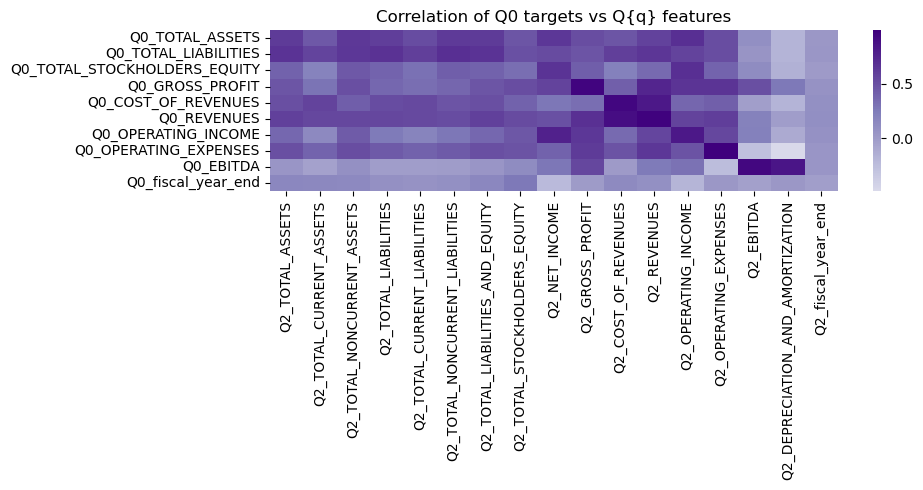

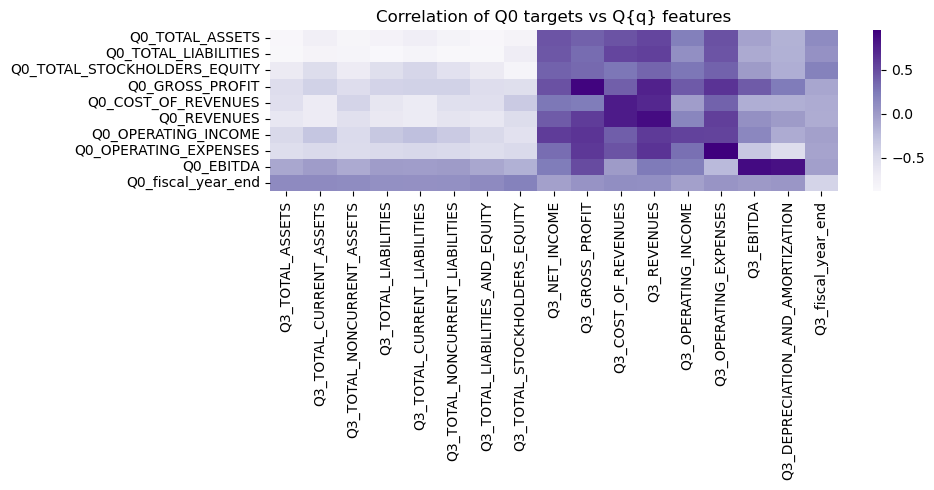

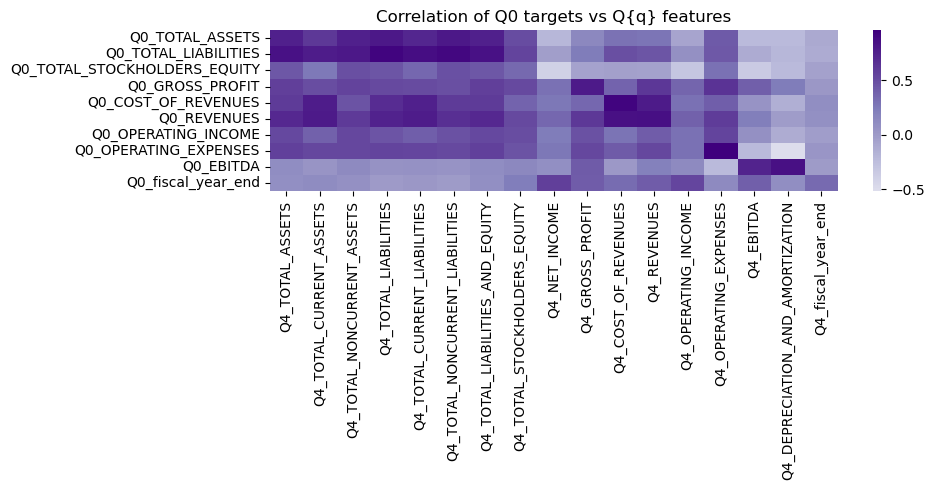

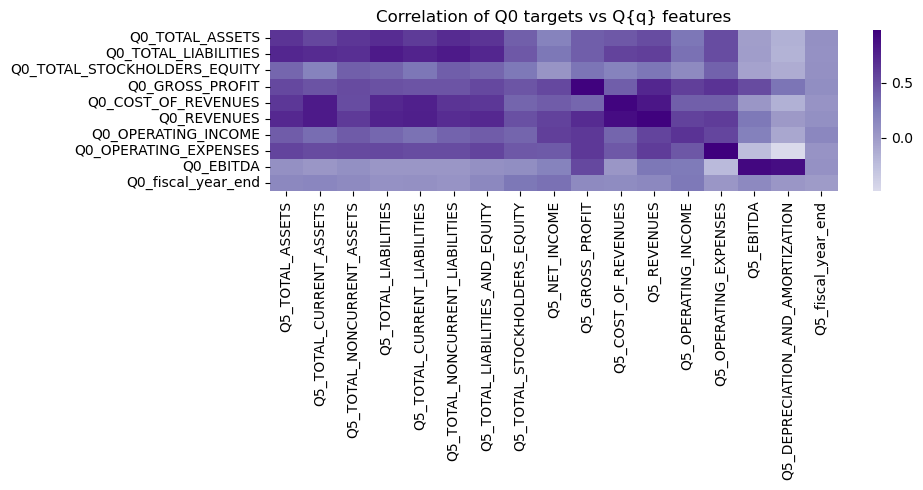

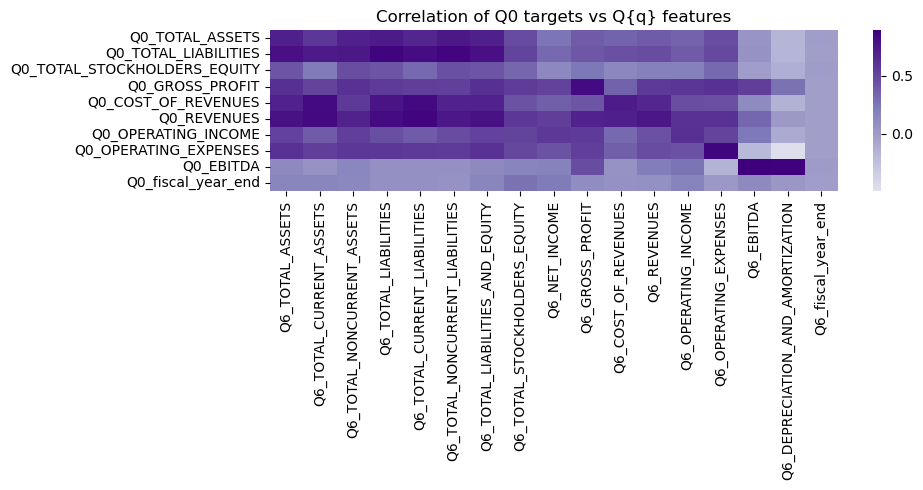

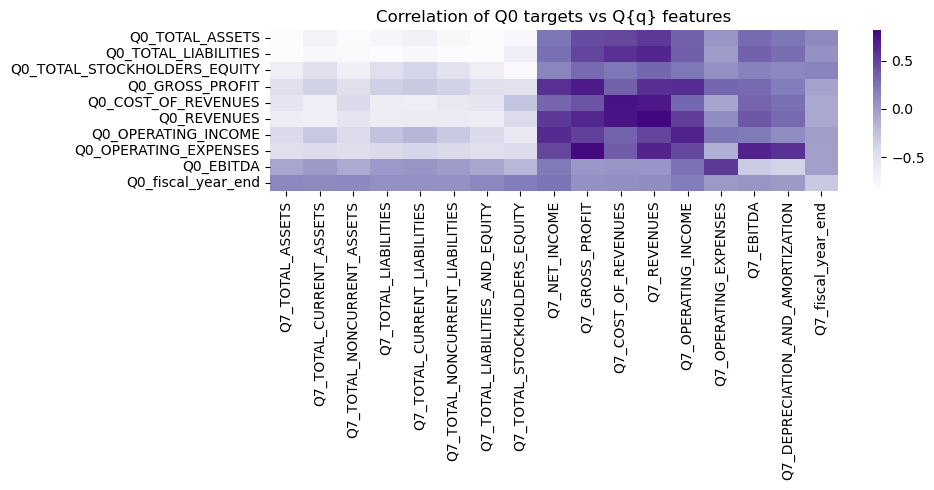

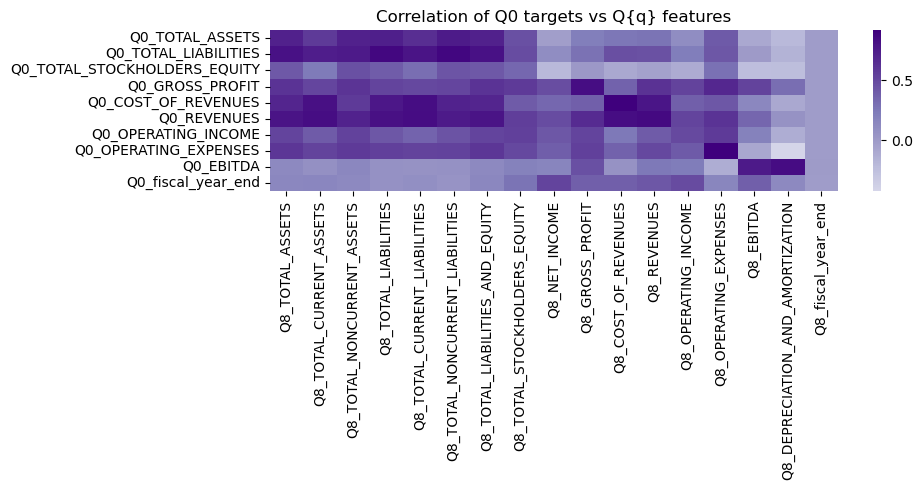

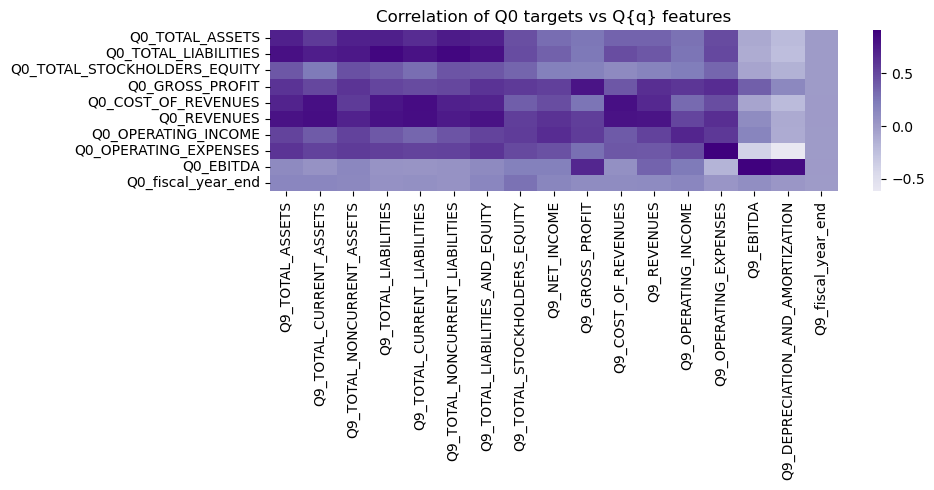

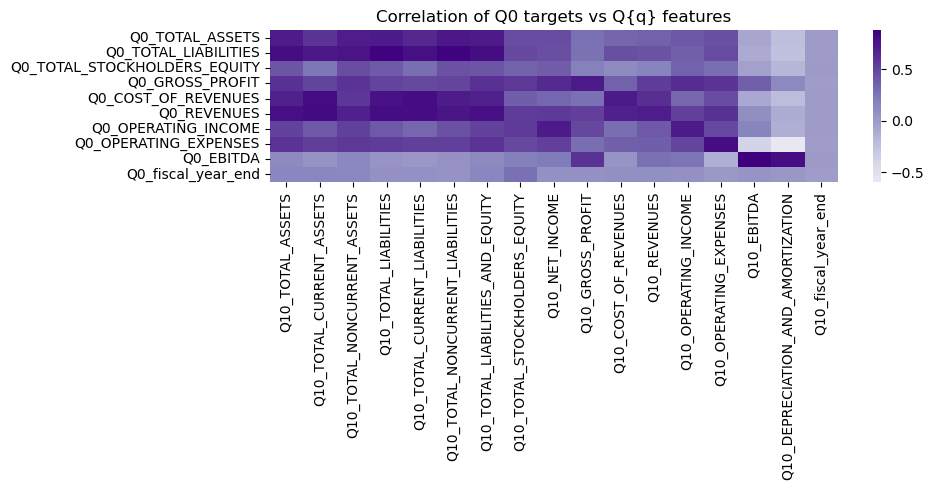

In [42]:
number_df=data.select_dtypes(include=["number"])
number_features=[c for c in number_df.columns if c not in targets]

for q in range(1,11):
    qcolumns=[c for c in number_df.columns if c.startswith(f"Q{q}_")]
    if not qcolumns:
        continue

    correlation=number_df[targets+qcolumns].corr()
    
    plt.figure(figsize=(10,5))
    sns.heatmap(correlation.loc[targets,qcolumns],cmap="Purples",center=0)
    plt.title("Correlation of Q0 targets vs Q{q} features")
    plt.tight_layout()
    plt.show()

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

numeric=data.select_dtypes(include=["number"]).columns.difference(targets)
categorical=data.select_dtypes(include=["object","category"]).columns

numeric_imputer=SimpleImputer(strategy="median",add_indicator=True)
categorical_encoder=OneHotEncoder(handle_unknown="ignore")

In [45]:
from sklearn.pipeline import Pipeline

preprocess=ColumnTransformer(
    transformers=[
        ("num",numeric_imputer,numeric),
        ("cat",categorical_encoder,categorical)])